<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [27]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create IoT Analytics client
client = boto3.client('iotanalytics')

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [28]:
dataset = "my_dataset_iot"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

# start working with the data

In [31]:
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']
data = pd.read_csv(dataset_url)
filtered_data = data[data['isactive'] == 1]

# Print the filtered data
print(filtered_data)

    thingid  temperature  humidity datetime message  vehicle_co2  thing_id  \
11      NaN          NaN       NaN      NaN     NaN      2955.05       4.0   
12      NaN          NaN       NaN      NaN     NaN      4011.99       4.0   
24      NaN          NaN       NaN      NaN     NaN      3948.88       4.0   
25      NaN          NaN       NaN      NaN     NaN         0.00       4.0   
26      NaN          NaN       NaN      NaN     NaN      5338.36       4.0   
..      ...          ...       ...      ...     ...          ...       ...   
295     NaN          NaN       NaN      NaN     NaN         0.00       0.0   
296     NaN          NaN       NaN      NaN     NaN         0.00       2.0   
297     NaN          NaN       NaN      NaN     NaN      7902.36       1.0   
298     NaN          NaN       NaN      NaN     NaN      4600.16       4.0   
299     NaN          NaN       NaN      NaN     NaN         0.00       3.0   

     timestep_time  vehicle_hc  vehicle_nox  ...  vehicle_pos  

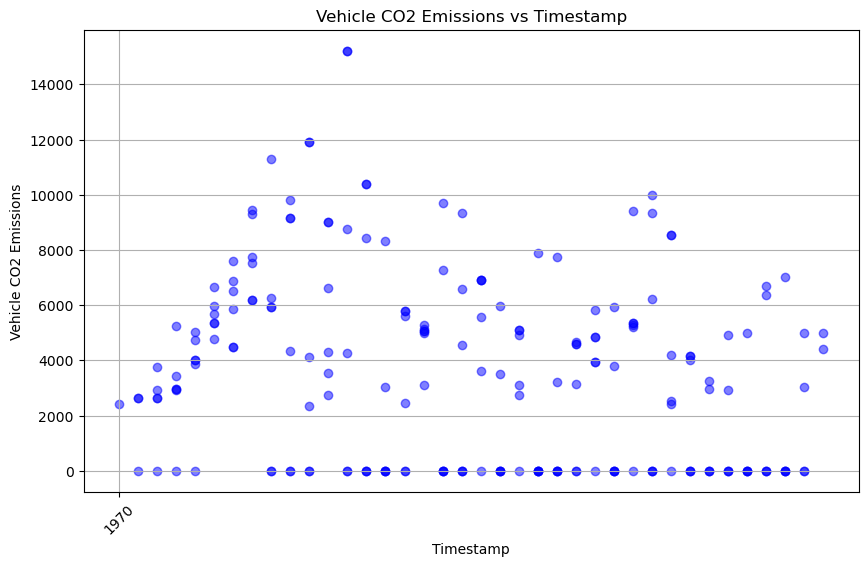

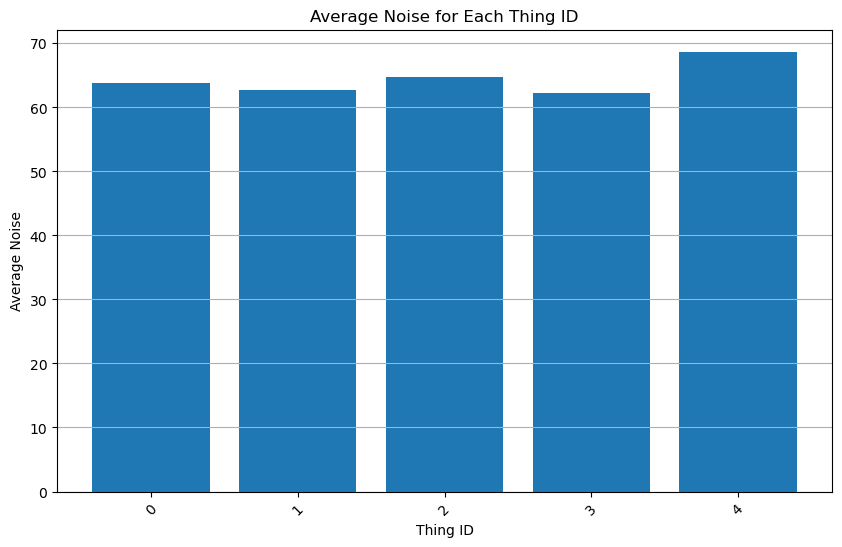

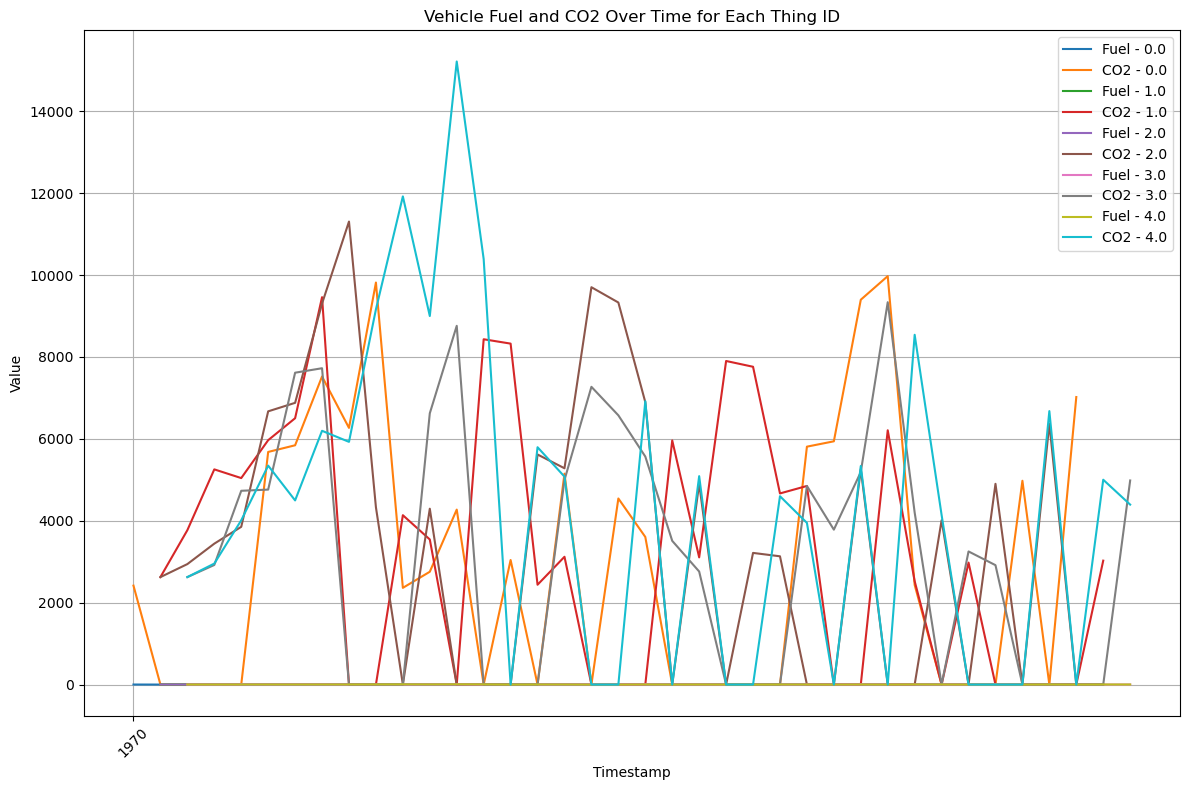

In [38]:
df = pd.DataFrame(data)

df['timestep_time'] = pd.to_datetime(df['timestep_time'])

# Sort the DataFrame by timestamp if it's not already sorted
df_sorted = df.sort_values(by='timestep_time')

# Plotting CO2 emissions vs timestamp
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['timestep_time'], df_sorted['vehicle_co2'], alpha=0.5, color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Vehicle CO2 Emissions')
plt.title('Vehicle CO2 Emissions vs Timestamp')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


avg_noise_per_thing = df.groupby('thing_id')['vehicle_noise'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_noise_per_thing['thing_id'], avg_noise_per_thing['vehicle_noise'])
plt.xlabel('Thing ID')
plt.ylabel('Average Noise')
plt.title('Average Noise for Each Thing ID')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Visualization 3: Scatter plot of Temperature vs Humidity

# Assuming your DataFrame is named df and 'timestep_time' is the timestamp column
# Convert the datetime column to datetime format if it's not already
df['timestep_time'] = pd.to_datetime(df['timestep_time'])

# Sort the DataFrame by timestamp if it's not already sorted
df_sorted = df.sort_values(by='timestep_time')

# Plotting vehicle_fuel and vehicle_co2 over time for each thing_id
plt.figure(figsize=(12, 8))

# Group by thing_id and plot each group
for thing_id, group in df_sorted.groupby('thing_id'):
    plt.plot(group['timestep_time'], group['vehicle_fuel'], label=f'Fuel - {thing_id}')
    plt.plot(group['timestep_time'], group['vehicle_co2'], label=f'CO2 - {thing_id}')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Vehicle Fuel and CO2 Over Time for Each Thing ID')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>